<a href="https://colab.research.google.com/github/jaiswal9/Data-Viz/blob/main/Final_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
pip install bqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [79]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
pip install plotly==5.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import geopandas as gpd
import requests
import bqplot
import ipywidgets
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import osmnx as ox
from shapely.geometry import Point
from sodapy import Socrata

In [82]:
#button code
#this creates a function getdata - getdata will collect the data from the source
#on button clicked is what is called when the button is clicked 

out = ipywidgets.Output(laylout = {'border': '1px solid black'})
data = []
def getdata(): 

#Drishti code: 

  # Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
  client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
  results = client.get("4dx7-axux", limit=2000)

# Convert to pandas DataFrame
  results_df = pd.DataFrame.from_records(results)


#Sam code:
  for i in results_df:
    data.append(results_df[i])
  return results_df
  
#sam
def on_button_clicked(b):
  getdata()
  with out:
    print('button clicked')

In [86]:
#create a button that runs getdata() (sam)
button = ipywidgets.Button(
    description = 'Get Data', 
    disabled = False, 
    button_style = '', 
    tooltip = 'Get Data',
    icon = 'check', 
)
display(button, out)

button.on_click(on_button_clicked)

Button(description='Get Data', icon='check', style=ButtonStyle(), tooltip='Get Data')

Output()

In [87]:
#this is the code that is making the data collected after clicking the button into a readable dataframe (sam)
d = pd.DataFrame(data)
df = pd.DataFrame.transpose(d)
df
#make sure to click get data before running the rest of the code!

,borough,restaurantname,seatingchoice,legalbusinessname,businessaddress,restaurantinspectionid,isroadwaycompliant,inspectedon,agencycode,postcode,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta,skippedreason
0,Manhattan,Oscar Wilde,both,Camelot Castle LLC,45 West 27th st,72891,Non-Compliant,2021-12-20T16:06:58.000,DOT,10001,40.744876,-73.989657,5,3,58,1015677,1008290011,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
1,Manhattan,LA RUBIA RESTAURANT,both,LA RUBIA RESTAURANT INC,3517 BROADWAY,72892,For HIQA Review,2021-12-20T16:18:42.000,DOT,10031,40.825863,-73.950874,9,7,229,1062369,1020910032,Hamilton Heights,NaN
2,Manhattan,Thai Sliders,sidewalk,Silom Thai Inc,150 8th Ave,72893,Non-Compliant,2021-12-20T16:35:41.000,DOT,10011,40.741906,-74.000945,4,3,81,1013845,1007670002,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
3,Brooklyn,Otway,both,St james 930 LLC,930 Fulton street,72894,Cease and Desist,2021-12-20T16:38:45.000,DOT,11238,40.682833,-73.963833,2,35,201,3335112,3020130038,Clinton Hill,NaN
4,Brooklyn,WILLIAMSBURG THAI CUISINE,both,WILLIAMSBURG THAI CUISINE NY INC,212 BEDFORD AVENUE,72896,Compliant,2021-12-20T16:52:41.000,DOT,11249,40.716913,-73.958728,1,33,553,3062192,3023350026,North Side-South Side,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Manhattan,Totto Ramen Midtown East,sidewalk,New Season Foods Corp.,248 East 52nd Street,75042,Cease and Desist,2022-02-18T12:56:14.000,DOT,10022,40.756603,-73.968749,6,4,98,1038490,1013250132,Turtle Bay-East Midtown,NaN
1996,Queens,Bund on Broadway,both,"Bund on Broadway & Company, Inc.",25 - 08 Broadway,75043,Cease and Desist,2022-02-18T13:05:47.000,DOT,11106,40.763304,-73.928214,1,22,53,4007156,4005800020,Astoria,NaN
1997,Brooklyn,SALVATORES,roadway,SALVATORE'S PIZZERIA NYC LLC,291 3 AVENUE,75044,Non-Compliant,2022-02-18T13:37:08.000,DOT,11215,40.676956,-73.986405,6,39,119,3007692,3004540013,Park Slope-Gowanus,NaN
1998,Manhattan,LA VILLETTA,both,JONILU LLC,398 EAST 52 STREET,75045,Cease and Desist,2022-02-18T13:46:58.000,DOT,10022,40.754988,-73.964927,6,4,8603,1081200,1013630047,Turtle Bay-East Midtown,NaN


In [88]:
#creating a copy of the data to manipulate into a geopandas data frame (sam)
ll = df[['latitude', 'longitude']].copy()
latlong = gpd.GeoDataFrame(ll, geometry = gpd.points_from_xy(ll.longitude, ll.latitude))

In [89]:
latlong

,latitude,longitude,geometry
0,40.744876,-73.989657,POINT (-73.98966 40.74488)
1,40.825863,-73.950874,POINT (-73.95087 40.82586)
2,40.741906,-74.000945,POINT (-74.00095 40.74191)
3,40.682833,-73.963833,POINT (-73.96383 40.68283)
4,40.716913,-73.958728,POINT (-73.95873 40.71691)
...,...,...,...
1995,40.756603,-73.968749,POINT (-73.96875 40.75660)
1996,40.763304,-73.928214,POINT (-73.92821 40.76330)
1997,40.676956,-73.986405,POINT (-73.98641 40.67696)
1998,40.754988,-73.964927,POINT (-73.96493 40.75499)


In [90]:
pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.2.2 requires matplotlib>=3.5, but you have matplotlib 3.1.1 which is incompatible.


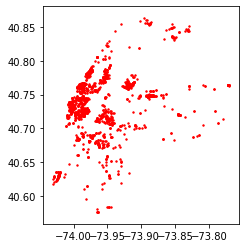

In [92]:
latlong.plot(color = 'red', markersize = 2)
#plot of the different restaurants (sam)

In [93]:
#creating a map of new york city (sam)
places = [
    "Manhattan, New York, New York, USA", 
    "Bronx, New York, New York, USA",
    "Queens, New York, New York, USA",
    "Brooklyn, New York, New York, USA",
    "Staten Island, New York, New York, USA",
]
p = ox.geocode_to_gdf(places)

In [94]:
p

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-74.04721 40.69089, -74.04720 ...",40.882012,40.679654,-73.906769,-74.047207,299212727,relation,8398124,40.789624,-73.959894,"Manhattan, New York County, New York, United S...",boundary,administrative,1.185439
1,"POLYGON ((-73.93391 40.88201, -73.92530 40.879...",40.917630,40.785739,-73.748374,-73.933907,299377514,relation,9691916,40.846651,-73.878594,"The Bronx, New York, United States",boundary,administrative,1.110803
2,"POLYGON ((-74.04378 40.50783, -73.97787 40.519...",40.812135,40.492121,-73.700233,-74.043780,299338987,relation,9691819,40.713508,-73.828313,"Queens, New York, United States",boundary,administrative,1.121584
3,"POLYGON ((-74.05669 40.62704, -74.05541 40.625...",40.739434,40.550339,-73.832945,-74.056688,299339507,relation,9691750,40.652601,-73.949721,"Brooklyn, Kings County, New York, United States",boundary,administrative,1.186380
4,"POLYGON ((-74.25884 40.49887, -74.25814 40.497...",40.651506,40.476578,-74.034613,-74.258843,299339926,relation,9691948,40.583456,-74.149605,"Staten Island, New York, United States",boundary,administrative,1.172141


In [95]:
#making a copy of the new york city info - only info we need (sam)
newyork = p[['geometry']].copy()

In [96]:
newyork

,geometry
0,"MULTIPOLYGON (((-74.04721 40.69089, -74.04720 ..."
1,"POLYGON ((-73.93391 40.88201, -73.92530 40.879..."
2,"POLYGON ((-74.04378 40.50783, -73.97787 40.519..."
3,"POLYGON ((-74.05669 40.62704, -74.05541 40.625..."
4,"POLYGON ((-74.25884 40.49887, -74.25814 40.497..."


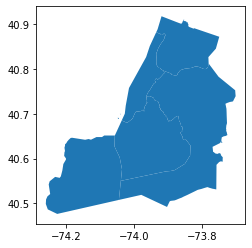

In [97]:
newyork.plot()
#plot of this new data of the area of new york city (sam)

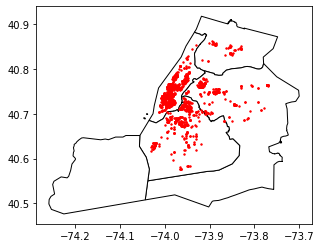

In [98]:
#plotting the points of the restaurants onto new york city (sam)
base = newyork.plot(color = 'white', edgecolor = 'black')
latlong.plot(ax = base, marker = 'o', color = 'red', markersize = 2)

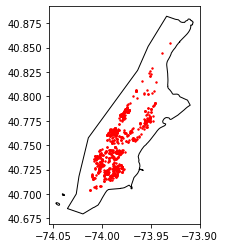

In [99]:
#this is code for only manhattan restaurants (sam)
place = ['Manhattan, New York, New York, USA']
p = ox.geocode_to_gdf(place)
manhattan = p[['geometry']].copy()
manhattan_results = df[df['borough'] == "Manhattan"]
llmanhattan = manhattan_results[['latitude', 'longitude']].copy()
latlongmanhattan = gpd.GeoDataFrame(llmanhattan, geometry = gpd.points_from_xy(llmanhattan.longitude, llmanhattan.latitude))
base = manhattan.plot(color = 'white', edgecolor = 'black')
latlongmanhattan.plot(ax = base, marker = 'o', color = 'red', markersize = 2)


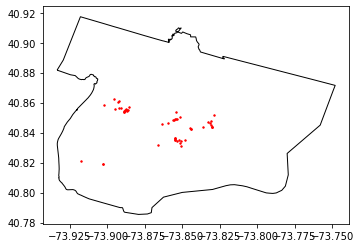

In [100]:
#only the bronx (sam)
place = ['Bronx, New York, New York, USA']
p = ox.geocode_to_gdf(place)
bronx = p[['geometry']].copy()
bronx_results = df[df['borough'] == "Bronx"]
llbronx = bronx_results[['latitude', 'longitude']].copy()
latlongbronx = gpd.GeoDataFrame(llbronx, geometry = gpd.points_from_xy(llbronx.longitude, llbronx.latitude))
base = bronx.plot(color = 'white', edgecolor = 'black')
latlongbronx.plot(ax = base, marker = 'o', color = 'red', markersize = 2)

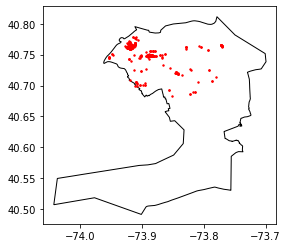

In [101]:
#plotting only restaurants in queens (sam)
place = ['Queens, New York, New York, USA']
p = ox.geocode_to_gdf(place)
queens = p[['geometry']].copy()
queens_results = df[df['borough'] == "Queens"]
llqueens = queens_results[['latitude', 'longitude']].copy()
latlongqueens = gpd.GeoDataFrame(llqueens, geometry = gpd.points_from_xy(llqueens.longitude, llqueens.latitude))
base = queens.plot(color = 'white', edgecolor = 'black')
latlongqueens.plot(ax = base, marker = 'o', color = 'red', markersize = 2)

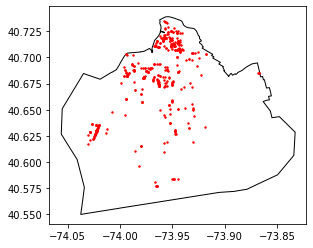

In [102]:
#only brooklyn plot (sam)
place = ['Brooklyn, New York, New York, USA']
p = ox.geocode_to_gdf(place)
brooklyn = p[['geometry']].copy()
brooklyn_results = df[df['borough'] == "Brooklyn"]
llbrooklyn = brooklyn_results[['latitude', 'longitude']].copy()
latlongbrooklyn = gpd.GeoDataFrame(llbrooklyn, geometry = gpd.points_from_xy(llbrooklyn.longitude, llbrooklyn.latitude))
base = brooklyn.plot(color = 'white', edgecolor = 'black')
latlongbrooklyn.plot(ax = base, marker = 'o', color = 'red', markersize = 2)

In [103]:
#finding the compliant restaurants and putting them into their own dataframe (sam)
compliant = df[df['isroadwaycompliant'] == 'Compliant']

In [104]:
compliant

,borough,restaurantname,seatingchoice,legalbusinessname,businessaddress,restaurantinspectionid,isroadwaycompliant,inspectedon,agencycode,postcode,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta,skippedreason
4,Brooklyn,WILLIAMSBURG THAI CUISINE,both,WILLIAMSBURG THAI CUISINE NY INC,212 BEDFORD AVENUE,72896,Compliant,2021-12-20T16:52:41.000,DOT,11249,40.716913,-73.958728,1,33,553,3062192,3023350026,North Side-South Side,NaN
5,Manhattan,LURE FISHBAR,both,142 MERCER STREET LLC,142 MERCER STREET,72897,Compliant,2021-12-20T16:56:14.000,DOT,10012,40.724837,-73.998402,2,1,49,1080019,1005120023,SoHo-TriBeCa-Civic Center-Little Italy,NaN
6,Manhattan,Mojo omakase,both,Mojo chef inc,177 9th avenue,72898,Compliant,2021-12-20T17:00:10.000,DOT,10011,40.744917,-74.002487,4,3,89,1088184,1007187501,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
16,Manhattan,Reliable Food,sidewalk,"Reliable Food, Inc",59 54th st,72908,Compliant,2021-12-21T10:26:26.000,DOT,10022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Manhattan,JUE LAN CLUB,both,Jade Farm LLC,49W 20th Street,10003,Compliant,2020-07-14T16:44:34.000,DEP,10011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,Manhattan,CIPRIANI DOWNTOWN RESTAURANT,both,DOWNTOWN RESTAURANT COMPANY LLC,376 WEST BROADWAY,74997,Compliant,2022-02-17T12:04:32.000,DOT,10012,40.723769,-74.002605,2,1,47,1007338,1004880034,SoHo-TriBeCa-Civic Center-Little Italy,NaN
1962,Brooklyn,El viejo yayo 2,both,Ivano restaurant corp.,317 9st,75005,Compliant,2022-02-17T13:37:11.000,DOT,11715,40.668911,-73.985747,6,39,137,3022143,3010050074,Park Slope-Gowanus,NaN
1965,Manhattan,Noi Due Carne,both,Noi Due Carne Inc.,141 West 69th Street,75009,Compliant,2022-02-17T13:55:35.000,DOT,10023,40.776033,-73.981485,7,6,153,1029634,1011410017,Lincoln Square,NaN
1978,Manhattan,Tequila Chitos Mexican Bar & Grill,sidewalk,Tequila Chitos Mexican Grill Inc.,358 W 23rd Street,75024,Compliant,2022-02-17T15:51:44.000,DOT,10011,40.745963,-74.000094,4,3,93,1013378,1007467501,Hudson Yards-Chelsea-Flatiron-Union Square,NaN


In [105]:
#finding only the noncompliant restaurants (sam)
noncompliant = df[df['isroadwaycompliant'] != 'Compliant']

In [106]:
noncompliant

,borough,restaurantname,seatingchoice,legalbusinessname,businessaddress,restaurantinspectionid,isroadwaycompliant,inspectedon,agencycode,postcode,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta,skippedreason
0,Manhattan,Oscar Wilde,both,Camelot Castle LLC,45 West 27th st,72891,Non-Compliant,2021-12-20T16:06:58.000,DOT,10001,40.744876,-73.989657,5,3,58,1015677,1008290011,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
1,Manhattan,LA RUBIA RESTAURANT,both,LA RUBIA RESTAURANT INC,3517 BROADWAY,72892,For HIQA Review,2021-12-20T16:18:42.000,DOT,10031,40.825863,-73.950874,9,7,229,1062369,1020910032,Hamilton Heights,NaN
2,Manhattan,Thai Sliders,sidewalk,Silom Thai Inc,150 8th Ave,72893,Non-Compliant,2021-12-20T16:35:41.000,DOT,10011,40.741906,-74.000945,4,3,81,1013845,1007670002,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
3,Brooklyn,Otway,both,St james 930 LLC,930 Fulton street,72894,Cease and Desist,2021-12-20T16:38:45.000,DOT,11238,40.682833,-73.963833,2,35,201,3335112,3020130038,Clinton Hill,NaN
7,Manhattan,Diller,sidewalk,Dillers Inc,357 Grand Street,72899,Suspended and Deactivated,2021-12-20T23:58:57.000,NaN,10002,40.716662,-73.989041,3,1,1401,1077604,1003110013,Lower East Side,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Manhattan,Totto Ramen Midtown East,sidewalk,New Season Foods Corp.,248 East 52nd Street,75042,Cease and Desist,2022-02-18T12:56:14.000,DOT,10022,40.756603,-73.968749,6,4,98,1038490,1013250132,Turtle Bay-East Midtown,NaN
1996,Queens,Bund on Broadway,both,"Bund on Broadway & Company, Inc.",25 - 08 Broadway,75043,Cease and Desist,2022-02-18T13:05:47.000,DOT,11106,40.763304,-73.928214,1,22,53,4007156,4005800020,Astoria,NaN
1997,Brooklyn,SALVATORES,roadway,SALVATORE'S PIZZERIA NYC LLC,291 3 AVENUE,75044,Non-Compliant,2022-02-18T13:37:08.000,DOT,11215,40.676956,-73.986405,6,39,119,3007692,3004540013,Park Slope-Gowanus,NaN
1998,Manhattan,LA VILLETTA,both,JONILU LLC,398 EAST 52 STREET,75045,Cease and Desist,2022-02-18T13:46:58.000,DOT,10022,40.754988,-73.964927,6,4,8603,1081200,1013630047,Turtle Bay-East Midtown,NaN


In [107]:
#geopandas dataframe of compliant (sam)
compliantll = compliant[['latitude', 'longitude']].copy()
compliantlatlong = gpd.GeoDataFrame(compliantll, geometry = gpd.points_from_xy(compliantll.longitude, compliantll.latitude))

In [108]:
compliantlatlong

,latitude,longitude,geometry
4,40.716913,-73.958728,POINT (-73.95873 40.71691)
5,40.724837,-73.998402,POINT (-73.99840 40.72484)
6,40.744917,-74.002487,POINT (-74.00249 40.74492)
16,NaN,NaN,POINT EMPTY
28,NaN,NaN,POINT EMPTY
...,...,...,...
1954,40.723769,-74.002605,POINT (-74.00261 40.72377)
1962,40.668911,-73.985747,POINT (-73.98575 40.66891)
1965,40.776033,-73.981485,POINT (-73.98149 40.77603)
1978,40.745963,-74.000094,POINT (-74.00009 40.74596)


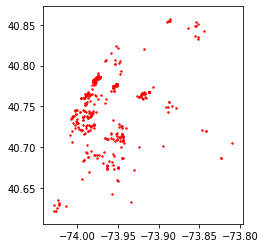

In [109]:
#plot of the compliant restaurants (sam)
compliantlatlong.plot(color = 'red', markersize = 2)

In [110]:
#creating the new base of new york city (sam)
places = [
    "Manhattan, New York, New York, USA", 
    "Bronx, New York, New York, USA",
    "Queens, New York, New York, USA",
    "Brooklyn, New York, New York, USA",
    "Staten Island, New York, New York, USA",
]
p = ox.geocode_to_gdf(places)
newyork = p[['geometry']].copy()

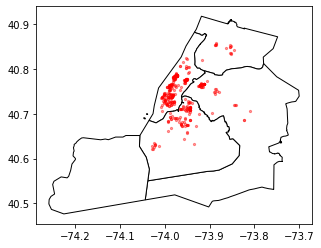

In [111]:
#plotting only the compliant restaurants onto the map of new york city (sam)
base = newyork.plot(color = 'white', edgecolor = 'black')
compliantlatlong.plot(ax = base, marker = 'o', color = 'red', markersize = 5, alpha = 0.4)

In [112]:
#making a map of the non compliant restuarants - geopandas (sam)
noncompliantll = noncompliant[['latitude', 'longitude']].copy()
noncompliantlatlong = gpd.GeoDataFrame(noncompliantll, geometry = gpd.points_from_xy(noncompliantll.longitude, noncompliantll.latitude))

In [113]:
noncompliantlatlong

,latitude,longitude,geometry
0,40.744876,-73.989657,POINT (-73.98966 40.74488)
1,40.825863,-73.950874,POINT (-73.95087 40.82586)
2,40.741906,-74.000945,POINT (-74.00095 40.74191)
3,40.682833,-73.963833,POINT (-73.96383 40.68283)
7,40.716662,-73.989041,POINT (-73.98904 40.71666)
...,...,...,...
1995,40.756603,-73.968749,POINT (-73.96875 40.75660)
1996,40.763304,-73.928214,POINT (-73.92821 40.76330)
1997,40.676956,-73.986405,POINT (-73.98641 40.67696)
1998,40.754988,-73.964927,POINT (-73.96493 40.75499)


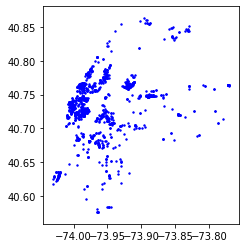

In [114]:
#plotting the non compliant restaurants (sam)
noncompliantlatlong.plot(color = 'blue', markersize = 2)

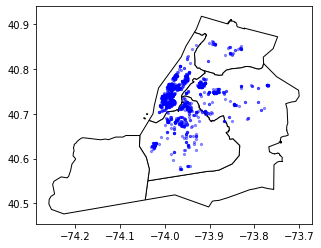

In [115]:
#plotting the points on new york city map (sam)
base = newyork.plot(color = 'white', edgecolor = 'black')
noncompliantlatlong.plot(ax = base, marker = 'o', color = 'blue', markersize = 5, alpha = 0.4)

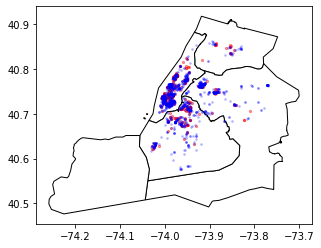

In [116]:
#plotting both the compliant and non compliant restaurants with the right colors on the map of new york city (sam)
base = newyork.plot(color = 'white', edgecolor = 'black')
compliantlatlong.plot(ax = base, marker = 'o', color = 'red', markersize = 5, alpha = 0.4)
noncompliantlatlong.plot(ax = base, marker = 'o', color = 'blue', markersize = 3, alpha = 0.2)

In [117]:
#dataframes of each of the different type of compliancy (sam)
noncompliant = df[df['isroadwaycompliant'] == 'Non-Compliant']
forhiqareview = df[df['isroadwaycompliant'] == 'For HIQA Review']
ceaseanddesist = df[df['isroadwaycompliant'] == 'Cease and Desist']
suspendedanddeactivated = df[df['isroadwaycompliant'] == 'Suspended and Deactivated']
skippedinspection = df[df['isroadwaycompliant'] == 'Skipped Inspection']
underreview = df[df['isroadwaycompliant'] == 'Under Review']
markedforremoval = df[df['isroadwaycompliant'] == 'Marked For Removal']
preremoval = df[df['isroadwaycompliant'] == 'Pre-Removal']
presuspension = df[df['isroadwaycompliant'] == 'Pre-Suspension']

In [118]:
#creating the bases for the bar graph (sam)
name = ['Compliant', 'Non-Compliant', 'For HIQA Review', 'Cease and Desist', 'Suspended and Deactivate', 'Skipped Inspection', 'Under Review', 'Marked For Removal', 'Pre-Removal', 'Pre-Suspension']
amount = [len(compliant), len(noncompliant), len(forhiqareview), len(ceaseanddesist), len(suspendedanddeactivated), len(skippedinspection), len(underreview), len(markedforremoval), len(preremoval), len(presuspension)]
colors = ['pink', 'red', 'orange', 'yellow', 'green', 'teal', 'blue', 'purple', 'brown', 'black']

Text(0, 0.5, 'Number of Restaurants')

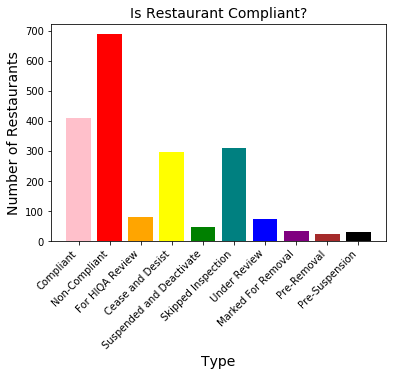

In [119]:
#creating a bar graph showing the different types of compliancy/noncompliancy (sam)
fig, ax = plt.subplots()

ax.bar(name, amount)

labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')

plt.bar(name, amount, color = colors)
plt.title('Is Restaurant Compliant?', fontsize=14)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

([<matplotlib.patches.Wedge at 0x7f74c9a26b80>,
 [Text(1.0388344016245117, 0.781551716779794, 'Compliant'),
  Text(-0.7914607321366023, 0.763930565880037, 'Non-Compliant'),
  Text(-0.9935195104995862, -0.47214296802627764, 'For HIQA Review'),
  Text(-0.5569787671123162, -0.9485645223104459, 'Cease and Desist'),
  Text(0.012978195476980913, -1.099923436627369, 'Suspended and Deactivate'),
  Text(0.5967547028136783, -0.9240583448407135, 'Skipped Inspection'),
  Text(1.0153545308255798, -0.4231491187890703, 'Under Review'),
  Text(1.0718956565692601, -0.24706214082282005, 'Marked For Removal'),
  Text(1.090180320943374, -0.14665220021466527, 'Pre-Removal'),
  Text(1.0987751887111823, -0.051894938796628175, 'Pre-Suspension')])

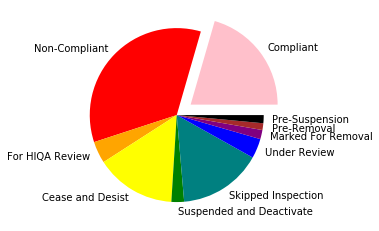

In [120]:
#same info but a pie chart with the compliant highlighted (sam)
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(amount, labels = name, explode = explode, colors = colors)

In [121]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("4dx7-axux", limit=2000)
results_df = pd.DataFrame.from_records(results)

In [122]:
results_df.rename(columns={'restaurantname': 'Restaurant_Name', 'legalbusinessname': 'Legal_Business_Name', 'isroadwaycompliant': 'Is_Roadway_Compliant', 'borough': 'Borough', 'restaurantname': 'Restaurant_Name', 'seatingchoice': 'Seating_Choice', 'businessaddress': 'Business_Address', 'restaurantinspectionid': 'Restaurant_Inspection_Id', 'inspectedon': 'Inspected_On', 'agencycode': 'Agency_Code', 'postcode': 'Post_Code', 'latitude': 'Latitude', 'longitude': 'Longitude', 'communityboard': 'Community_Board', 'councildistrict': 'Council_District'},inplace=True) 
results_df.head()

,Borough,Restaurant_Name,Seating_Choice,Legal_Business_Name,Business_Address,Restaurant_Inspection_Id,Is_Roadway_Compliant,Inspected_On,Agency_Code,Post_Code,Latitude,Longitude,Community_Board,Council_District,censustract,bin,bbl,nta,skippedreason
0,Manhattan,Oscar Wilde,both,Camelot Castle LLC,45 West 27th st,72891,Non-Compliant,2021-12-20T16:06:58.000,DOT,10001,40.744876,-73.989657,5,3,58,1015677,1008290011,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
1,Manhattan,LA RUBIA RESTAURANT,both,LA RUBIA RESTAURANT INC,3517 BROADWAY,72892,For HIQA Review,2021-12-20T16:18:42.000,DOT,10031,40.825863,-73.950874,9,7,229,1062369,1020910032,Hamilton Heights,NaN
2,Manhattan,Thai Sliders,sidewalk,Silom Thai Inc,150 8th Ave,72893,Non-Compliant,2021-12-20T16:35:41.000,DOT,10011,40.741906,-74.000945,4,3,81,1013845,1007670002,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
3,Brooklyn,Otway,both,St james 930 LLC,930 Fulton street,72894,Cease and Desist,2021-12-20T16:38:45.000,DOT,11238,40.682833,-73.963833,2,35,201,3335112,3020130038,Clinton Hill,NaN
4,Brooklyn,WILLIAMSBURG THAI CUISINE,both,WILLIAMSBURG THAI CUISINE NY INC,212 BEDFORD AVENUE,72896,Compliant,2021-12-20T16:52:41.000,DOT,11249,40.716913,-73.958728,1,33,553,3062192,3023350026,North Side-South Side,NaN


In [123]:
#drishti
results_df = results_df.dropna(subset=['Latitude', 'Longitude', 'Community_Board', 'Council_District', 'censustract'])

In [124]:
#drishti
results_df = results_df.astype({'Borough': 'string', 
                                'Restaurant_Name': 'string', 
                                'Seating_Choice': 'string', 
                                'Legal_Business_Name': 'string', 
                                'Business_Address': 'string', 
                                'Restaurant_Inspection_Id': 'int' , 
                                'Is_Roadway_Compliant': 'string',  
                                'Agency_Code': 'string', 
                                'Post_Code': 'int', 
                                'Latitude': 'float', 
                                'Longitude': 'float', 
                                'Community_Board': 'int', 
                                'Council_District': 'float', 
                                'censustract': 'float'})

In [125]:
#drishti
results_df["Inspected_On"]= pd.to_datetime(results_df["Inspected_On"])

In [126]:
#drishti
Borough = results_df["Borough"].unique()
UniqueCompliant = results_df['Is_Roadway_Compliant'].unique()

In [127]:
#drishti
from google.colab import output
output.enable_custom_widget_manager()

In [128]:
#drishti
def search(listA,term):
    for i in range(0,len(listA)):
        if listA[i]==term:
            return i
    return -1
            
def changed(x):
    if x.name == "value":
        if x.new == False:
            cbDic[x.owner.description]=False
        elif x.new == True:
            cbDic[x.owner.description]=True
        
        arr = []
        for k in cbDic.keys():
            if cbDic[k]==True:
                arr.append(k)
    
        with fig.batch_update():
             
            for i in range(len(fig.data)):
                fig.data[i].x=np.array(arr)
        
                    
                    
                
                

dataset = results_df[['Borough', 'Is_Roadway_Compliant']]
containerChildren = []
cbDic = {}
for b in Borough:
    chbox = widgets.Checkbox(value=True,description=b ,disabled=False,indent=False)
    chbox.observe(changed)
    containerChildren.append(chbox)
    cbDic[b]=True

data = []
bdMatrix = []
for b in Borough:
    d ={}
    for c in UniqueCompliant:
        d[c]=0
    tempdf = dataset[dataset.Borough==b].groupby(['Is_Roadway_Compliant'])['Is_Roadway_Compliant'].count()
    for i in d.keys():
        try :
            d[i]=tempdf[i]
        except :
            d[i]=0
    bdMatrix.append(list(d.values()))
    #trace = go.Bar(x=Borough y=list(d.values()))

for i in range(0,len(bdMatrix[0])):
    trace = go.Bar(x=Borough, y=[bdMatrix[v][i] for v in range(len(bdMatrix))], name=UniqueCompliant[i])
    data.append(trace)
    
layout = go.Layout(barmode='group')

#containerChildren.append(fig) 
data_final = data.copy()
fig = go.FigureWidget(data=data_final,layout=layout)



In [129]:
#drishti
checkboxContainer = widgets.HBox(children=containerChildren)
figContainer = widgets.VBox(children=[fig])
container = widgets.VBox(children= [checkboxContainer,figContainer])
container

Text(0.5, 1.0, 'Number of Restaurants in each Borough')

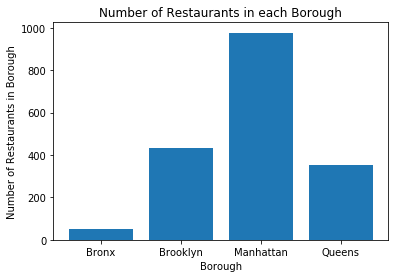

In [130]:
results_df_2=results_df.groupby(['Borough']).count()
results_df_2 = results_df_2.reset_index()
plt.bar(results_df_2["Borough"], results_df_2["Restaurant_Inspection_Id"])
plt.xlabel("Borough")
plt.ylabel("Number of Restaurants in Borough")
plt.title("Number of Restaurants in each Borough")

In [131]:
fig = px.bar(results_df_2, x="Borough", y="Is_Roadway_Compliant", color = "Borough")
fig.show()

In [132]:
#Count of Restaurants inspected every year
#results_df_4['year']=results_df['Inspected_On'].apply(lambda x:x.split('-')[0])
results_df['year'] = pd.to_datetime(results_df['Inspected_On']).dt.date

Text(0.5, 1.0, 'Number of Restaurants in each Council District')

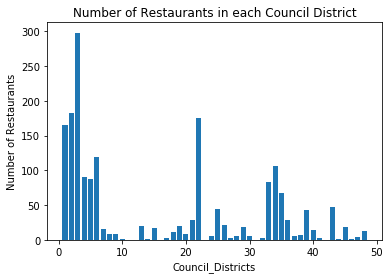

In [133]:
results_df_4=results_df.groupby(['Council_District']).count()
results_df_4 = results_df_4.reset_index()
plt.bar(results_df_4["Council_District"], results_df_4["Restaurant_Inspection_Id"])
plt.xlabel("Council_Districts")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants in each Council District")

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Text(0.5, 1.0, 'Number of Compliant Restaurants in each Council District')

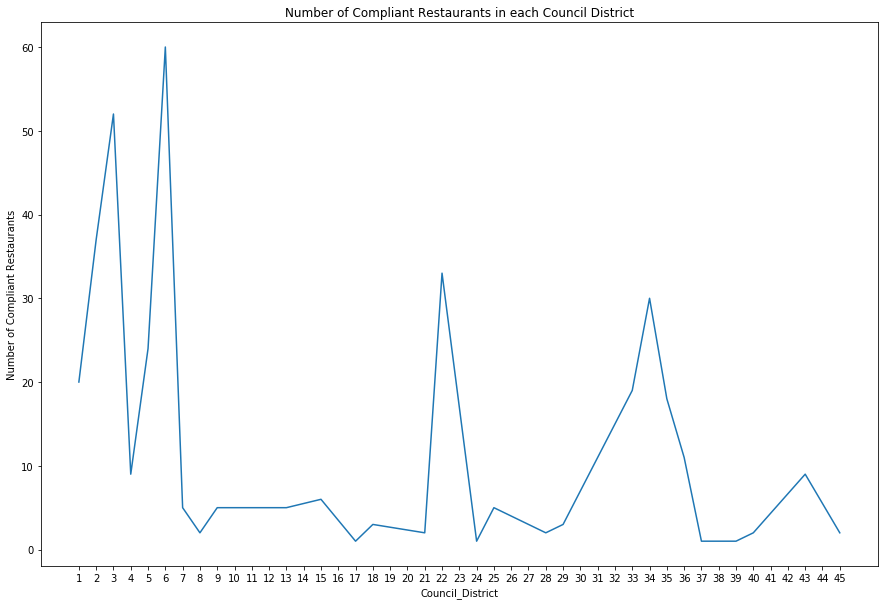

In [134]:
#Compliant Restaurants in each Council District
plt.figure(figsize=(15,10))
results_df_4= results_df[results_df['Is_Roadway_Compliant'] == 'Compliant']
#results_df_4=results_df_4.groupby(['Council_District])['Is_Roadway_Compliant'].count()
results_df_4=results_df_4.groupby(['Council_District'])['Is_Roadway_Compliant'].count()
results_df_4 = results_df_4.reset_index()
plt.plot(results_df_4['Council_District'], results_df_4['Is_Roadway_Compliant'])
highest_cd=int(max(results_df_4['Council_District']))+1
plt.xticks([i for i in range(1, highest_cd)])
plt.xlabel("Council_District")
plt.ylabel("Number of Compliant Restaurants")
plt.title("Number of Compliant Restaurants in each Council District")

Text(0.5, 1.0, 'Number of Compliant Restaurants By Choice of Seating')

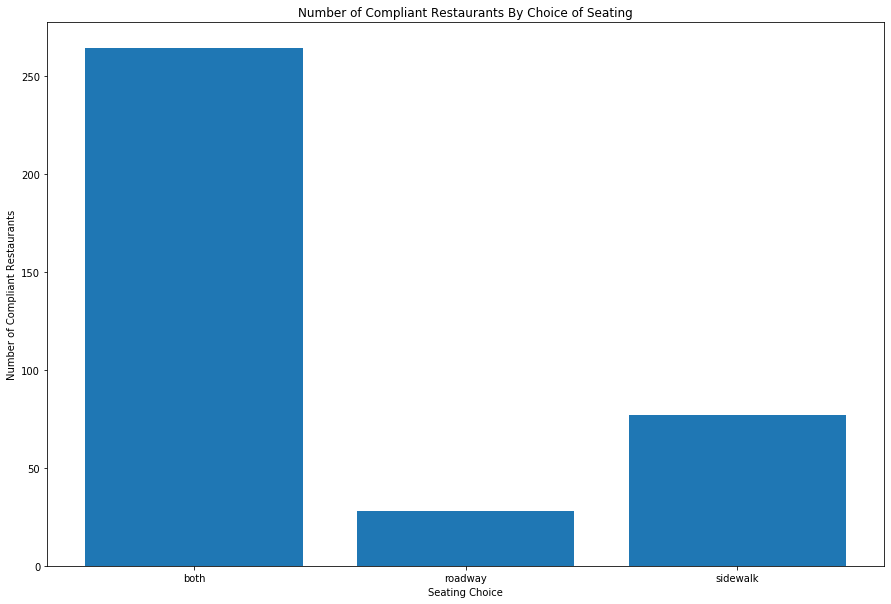

In [135]:
#Compliant Restaurants in each Council District
plt.figure(figsize=(15,10))
results_df_5= results_df[results_df['Is_Roadway_Compliant'] == 'Compliant']
results_df_5=results_df_5.groupby(['Seating_Choice'])['Is_Roadway_Compliant'].count()
results_df_5 = results_df_5.reset_index()
plt.bar(results_df_5['Seating_Choice'], results_df_5['Is_Roadway_Compliant'])
#plt.xticks([i for i in range(1, highest_cd)])
plt.xlabel("Seating Choice")
plt.ylabel("Number of Compliant Restaurants")
plt.title("Number of Compliant Restaurants By Choice of Seating")

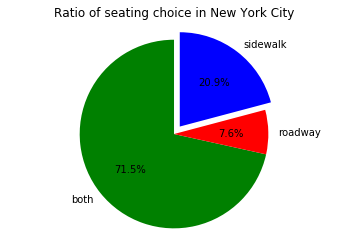

In [136]:
labels= list(results_df_5['Seating_Choice'])

colors=['green', 'red', 'blue']

sizes= list(results_df_5['Is_Roadway_Compliant'])

explode = (0, 0, 0.1)

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', explode=explode)

plt.axis('equal')

plt.title("Ratio of seating choice in New York City")

plt.show()

In [137]:
Borough = results_df["Borough"].unique()
UniqueCompliant = dataset['Is_Roadway_Compliant'].unique()

In [138]:
def search(listA,term):
    for i in range(0,len(listA)):
        if listA[i]==term:
            return i
    return -1
            
def changed(x):
    if x.name == "value":
        if x.new == False:
            cbDic[x.owner.description]=False
        elif x.new == True:
            cbDic[x.owner.description]=True
        
        arr = []
        for k in cbDic.keys():
            if cbDic[k]==True:
                arr.append(k)
    
        with fig.batch_update():
             
            for i in range(len(fig.data)):
                fig.data[i].x=np.array(arr)
        
                    
                    
                
                

dataset = results_df[['Borough', 'Is_Roadway_Compliant']]
containerChildren = []
cbDic = {}
for b in Borough:
    chbox = widgets.Checkbox(value=True,description=b ,disabled=False,indent=False)
    chbox.observe(changed)
    containerChildren.append(chbox)
    cbDic[b]=True

data = []
bdMatrix = []
for b in Borough:
    d ={}
    for c in UniqueCompliant:
        d[c]=0
    tempdf = dataset[dataset.Borough==b].groupby(['Is_Roadway_Compliant'])['Is_Roadway_Compliant'].count()
    for i in d.keys():
        try :
            d[i]=tempdf[i]
        except :
            d[i]=0
    bdMatrix.append(list(d.values()))
    #trace = go.Bar(x=Borough y=list(d.values()))

for i in range(0,len(bdMatrix[0])):
    trace = go.Bar(x=Borough, y=[bdMatrix[v][i] for v in range(len(bdMatrix))], name=UniqueCompliant[i])
    data.append(trace)
    
layout = go.Layout(barmode='group')

#containerChildren.append(fig) 
data_final = data.copy()
fig = go.FigureWidget(data=data_final,layout=layout)


In [139]:
checkboxContainer = widgets.HBox(children=containerChildren)
figContainer = widgets.VBox(children=[fig])
container = widgets.VBox(children= [checkboxContainer,figContainer])

In [140]:
container